# 1. Введение
Введение
Редкая программа обходится без ошибок: получить исключение (ошибку) — нормальная и неизбежная часть программирования. В этом модуле мы разберёмся, как с ними работать.

Мы рассмотрим:
- Что такое ошибки и исключения в Python, как их определять и использовать для собственной пользы.
- Как делать отладку программы, чтобы избавляться от ошибок и багов.
- Что такое тестирование, зачем применяется и как делать его на базовом уровне.

При изучении модуля понадобится знание базовых конструкций языка и функций. К концу модуля вы будете комфортно чувствовать себя при возникновении ошибок, эффективнее устранять их и писать более надёжный и ошибкоустойчивый код.

# 2. Чтение сообщений об ошибках
Чтение сообщений об ошибках
Программа — набор инструкций, которые мы отправляем интерпретатору. Когда интерпретатор не понимает наших инструкций, он сообщает об этом. В сообщениях об ошибках в Python содержится много полезной информации, и правильно их читать — полезный навык.

In [ ]:
# Мы допустили синтаксическую ошибку и получили сообщение:
print("hello')
# File "<ipython-input-12-44b41e33c4a4>", line 1  
#     print("hello')  
#                   ^  
# SyntaxError: EOL while scanning string literal  

На что стоит обратить внимание:
- Сообщение начинается с названия файла, где допущена ошибка. В примере это ячейка из Jupyter, поэтому название является техническим. Если вы собираете проект из многих файлов, то здесь будет имя соответствующего файла.
- После названия файла идёт номер строки с ошибкой, в данном случае — первая строка (line 1).
- Дальше выводится строка из кода, так что вы сразу можете оценить, что пошло не так.
- В конце указывается, что это была синтаксическая ошибка (SyntaxError), и идёт пояснительное сообщение. У разных синтаксических ошибок пояснительное сообщение разное и обычно позволяет понять, как исправить ошибку.

Лучше начинать чтение сообщения с конца, чтобы понять, на что жалуется интерпретатор, а потом уже смотреть, где именно.

# Задание
Какой номер у строки с ошибкой, судя по этому сообщению?

```
File "<ipython-input-273-806349a3f7cd>", line 6
    def street(street_name, last_house)
                                       ^
SyntaxError: invalid syntax
```

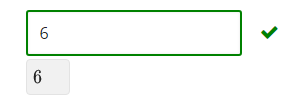

# 3. Исключения
Исключения
Синтаксические ошибки исправлять проще всего: это небольшие опечатки, и даже если мы их допустили, часто они находятся в одной строчке, на которую нам указывает интерпретатор. Более интересный класс ошибок — исключения, неудачные сочетания логики и данных:
```
a = 5 / 0  
  
# ---------------------------------------------------------------------------  
# ZeroDivisionError                         Traceback (most recent call last)  
# <ipython-input-8-100452e908e9> in <module>  
# ----> 1 a = 5 / 0  
#       2   
  
# ZeroDivisionError: division by zero  
```

Мы стали делить на ноль, и Python вывел сообщение об ошибке, так же как и с синтаксической ошибкой:
- название исключения (ZeroDivisionError);
- файл, номер строки и сама строка с ошибкой;
- название исключения повторяется и добавляется поясняющее сообщение division by zero.

Если ошибка будет в другом, название исключения и поясняющее сообщение изменится:<
```
dictionary = {"cheboksary": "city", "cheburek": "food"}  
dictionary["cheburshka"]  
  
# ---------------------------------------------------------------------------  
# KeyError                                  Traceback (most recent call last)  
# <ipython-input-14-92e65e28b279> in <module>  
#       1 dictionary = {"cheboksary": "city"}  
# ----> 2 dictionary["cheburshka"]  
  
# KeyError: 'cheburshka'  
```
В этом примере мы получили KeyError — отсутствующий ключ в словаре и сам ключ.

# Задание
Назовите имя исключения по сообщению об ошибке:
```
---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
ipython-input-275-905b846ab02e in module
      4     csv_file = open("random.csv")
      5 
----> 6 open_imdb()
      7 

ipython-input-275-905b846ab02e in open_imdb()
      2 
      3 def open_imdb():
----> 4     csv_file = open("random.csv")
      5 
      6 open_imdb()

FileNotFoundError: [Errno 2] No such file or directory: 'random.csv'
```

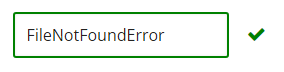

# 4. Стэк вызова
Мы говорили, что в сообщении об ошибке указывается файл и номер строки, где она случилась. На самом деле указывается стэк вызова (Traceback). Это весь путь, который проходит интерпретатор до того, как встретил ошибку. Посмотрим на примере: программа генерирует номера домов на улице, добавляя номер дома к названию улицы:
```
# адрес одного дома  
def house_address(street, number):  
    return street + ' ' + number   
  
# адреса домов на улице  
def street(street_name, last_house):  
    addresses = []  
    for i in range(last_house):  
        addresses.append(house_address(street_name, i+1))  
    return addresses   
  
street("Tverskaya", 7)  
# ---------------------------------------------------------------------------  
# TypeError                                 Traceback (most recent call last)  
# <ipython-input-42-6d472b2b2793> in <module>  
#      10     return addresses  
#      11   
# ---> 12 street("Tverskaya", 7)  
#      13   
#      14 # ---------------------------------------------------------------------------  
  
# <ipython-input-42-6d472b2b2793> in street(street_name, last_house)  
#       7     addresses = []  
#       8     for i in range(last_house):  
# ----> 9         addresses.append(house_address(street_name, i+1))  
#      10     return addresses  
#      11   
  
# <ipython-input-42-6d472b2b2793> in house_address(street, number)  
#       1 # адрес одного дома  
#       2 def house_address(street, number):  
# ----> 3     return street + ' ' + number  
#       4   
#       5 # адреса домов на улице  
  
# TypeError: must be str, not int
```
Мы сначала вызвали функцию street, которая воспользовалась house_address, где уже закралась ошибка. Сообщение большое и может казаться неподъёмным, но это просто список всех наших функций с их местоположением и кодом, приведённый в том порядке, как мы их вызывали:
- вызов street на 12-ой строчке;
- вызов house_address внутри street на 9-ой;
- ошибка на 3-ей строчке;
- интерпретатор получил число там, где ожидал строку.

Мы пытаемся сложить строку street с числом number. Достаточно поменять street + ' ' + number на форматированную строку f"{street} {number}", чтобы программа корректно заработала.

# Задание
Приведён стэк вызова из сообщения об ошибке. Назовите имя функции, внутри которой произошла ошибка:
```
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
ipython-input-1-70bd89baa4df in module()
      6     print(ice_creams[3])
      7
----> 8 favorite_ice_cream()

ipython-input-1-70bd89baa4df in favorite_ice_cream()
      4         "vanilla", "strawberry"
      5     ]
----> 6     print(ice_creams[3])
      7
      8 favorite_ice_cream()

IndexError: list index out of range
```

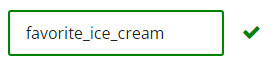

Зачем такой стэк  
Зачем нам предыдущие шаги в стэке вызова, если в конце показывается истинное место ошибки? Причины две:
1. Одна и та же функция может вызваться в разных местах с разными данными: полный путь помогает понять контекст.
2. Вы пользуетесь сторонней библиотекой и некорректно применили функцию из неё: тогда ошибка может уйти глубже, и в конце стэка будут показываться нерелеватные внутренности библиотеки, а нужная функция будет в середине стэка.

# 5. Что такое исключение
При ошибках Python генерирует исключения: разберёмся, что это такое и откуда они берутся. Исключения — это ещё один тип данных, как строки или числа.
```
print(type("Skillfactory"))  
# => <class 'str'>  
print(type(42))  
# => <class 'int'>  
print(type(ValueError()))  
# => <class 'ValueError'>  
```
Когда программа встречает некорректные ситуации, она выбрасывает исключения. Для базовых случаев это делает сам интерпретатор, но могут делать и авторы библиотек и программ в определённых ситуациях. Для этого есть специальный синтаксис raise Exception().
```
raise RuntimeError()  
# ---------------------------------------------------------------------------  
# RuntimeError                              Traceback (most recent call last)  
# <ipython-input-68-0231bb10278f> in <module>  
# ----> 1 raise RuntimeError()  
#       2 # ---------------------------------------------------------------------------  
#       3 # RuntimeError                              Traceback (most recent call last)  
#       4 # <ipython-input-66-a23cb6c08fe6> in <module>  
#       5 # ----> 1 raise RuntimeError  
  
# RuntimeError:  
```
Зачем специально генерировать ошибку в собственном коде? Для того, чтобы писать более предсказуемый код, во многих ситуациях выбросить ошибку лучше, чем работать с некорректными данными. Выбрасывание исключений является повсеместной практикой в Python и других языках программирования.

Давайте посмотрим на примере: у вас есть функция, которая сортирует объекты и делает разные действия. Пусть она сортирует фрукты на яблоки и апельсины:
```
def show_fruit(fruit):  
    if fruit == "apple":  
        print("Ready to eat")  
    elif fruit == "orange":  
        print("You need to peel first")  
  
show_fruit("apple")  
# => ready to eat  
```
Что произойдёт, если мы вызовем эту функцию для морковки? Ничего: мы некорректно использовали функцию, и она нам позволила это сделать. Более корректно было бы выбросить ошибку:
```
def show_fruit(fruit):  
    if fruit == "apple":  
        print("Ready to eat")  
    elif fruit == "orange":  
        print("You need to peel first")  
    else:  
        raise ValueError()  
  
show_fruit("apple")  
# => ready to eat  
show_fruit("carrot")  
# ---------------------------------------------------------------------------  
# ValueError                                Traceback (most recent call last)  
# <ipython-input-77-cebc852b319b> in <module>  
#       9 show_fruit("apple")  
#      10 # => ready to eat  
# ---> 11 show_fruit("carrot")  
#      12 # ---------------------------------------------------------------------------  
#      13 # ValueError                                Traceback (most recent call last)  
  
# <ipython-input-77-cebc852b319b> in show_fruit(fruit)  
#       5         print("You need to peel first")  
#       6     else:  
# ----> 7         raise ValueError()  
#       8   
#       9 show_fruit("apple")  
  
# ValueError:  
```
Здесь мы выбросили ошибку значения для некорректных данных (ValueError), но ошибка не информативная. Мы можем добавить поясняющее сообщение в скобках, чтобы было проще понять причину.
```
def show_fruit(fruit):  
    if fruit == "apple":  
        print("Ready to eat")  
    elif fruit == "orange":  
        print("You need to peel first")  
    else:  
        raise ValueError("You need to pass correct fruit")  
  
show_fruit("apple")  
# => ready to eat  
show_fruit("carrot")  
# ---------------------------------------------------------------------------  
# ValueError                                Traceback (most recent call last)  
# <ipython-input-75-65397b99c8d4> in <module>  
#       9 show_fruit("apple")  
#      10 # => ready to eat  
# ---> 11 show_fruit("carrot")  
  
# <ipython-input-75-65397b99c8d4> in show_fruit(fruit)  
#       5         print("You need to peel first")  
#       6     else:  
# ----> 7         raise ValueError("You need to pass correct fruit")  
#       8   
#       9 show_fruit("apple")  
  
# ValueError: You need to pass correct fruit  
```
В последней строчке у нас добавилось пояснение, что мы передали какой-то некорректный фрукт. В Python достаточно много встроенных типов исключений. Вы можете посмотреть их в документации к языку и выбирать подходящий по смыслу для вашей ситуации.

# Задание 1
Напишие текст, который выведется на последней строке при исполнении программы:
```
def preprocess_data(data, mode):
    if mode == "to_number":
        return [float(value) for value in data]
    elif mode == "to_str":
        return [str(value) for value in data]
    else:
        raise ValueError("Incorrect mode")
        
preprocess_data({"price": 100}, "to_array")
```

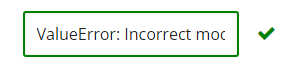

# Задание 2
Определите функцию check_server, которая принимает на вход переменную mode.
- Если mode имеет значение "memory", программа должна вернуть строку "Memory is ok".
- Если mode имеет значение "connection", программа должна вернуть строку "Connection is ok".
- Для остальных случае программа должна выбросить исключение ValueError.

# 6. Обработка исключений
Обработка исключений
Мы научились выбрасывать исключения, и потенциально это ломает программу. Очевидный способ избавиться от этого — исправить ошибку, но бывают ситуации, когда мы не вполне контролируем данные, например, пользовательский ввод или большая база данных с небольшим количеством искаженных данных. Изредка мы всё-таки будем получать исключения, и нам надо с этим как-то работать.

Для этой цели мы можем воспользоваться блоком отработки исключений — try-except. Он позволяет отрабатывать исключения, не прерывая хода программы. Без блока try-except в примере мы бы получили KeyError, здесь же мы печатаем строку Oops, key not found и продолжаем выполнение программы.
```
dictionary = {}  
try:  
    dictionary["no_key"]  
except:  
    print("Oops, key not found")  
  
print("End of program")  
# => Oops, key not found  
# => End of program  
```
Если более формально, то мы пробуем выполнить часть программы, которая находится внутри try. Если эта часть кода выбрасывает исключение, то мы сразу переходим к выполнению части внутри except. Если же исключение не выбрасывается, то мы пропускаем часть внутри except. В любом случае мы выполняем программу дальше, как обычно.

# Задание 1
Что выведет этот блок try-except?
```
try:
    print("Inside try block")
except:
    print("Inside except block")
```

# Задание 2
Что выведет этот блок try-except?
```
try:
    4 + "b"
    print("Inside try block")
except:
    print("Inside except block")
```

# 7. Осознанная обработка исключений
Осознанная обработка исключений  
Общая идея использования try-except такая:
- вы знаете, что у вас может возникнуть исключение, и не можете его полностью избежать;
- вы "отлавливаете" эти исключения, а в блок except помещаете логику, которая позволит вам из этой ситуации корректно выйти.

Когда мы вызываем raise, то делаем подачу: тут какие-то не такие данные, нужно исправить. Когда мы обрабатываем исключения через try-except, то принимаем: да, данные неидеальные, но я об этом подумал. Проблема в том, что с обычным try-except можно "отловить" не только те исключения, на которые мы рассчитывали. 

Посмотрим на примере: у нас есть программа, которая отрабатывает очень большую базу данных, и мы бы хотели, чтобы была возможность корректно прервать её с клавиатуры. Код мог бы выглядеть как-то так:
```
try:  
    # запускаем программу отработки базы данных  
    process(db)   
except:  
    # если с клавиатуры пришло прерывание, то корректно останавливаем процесс  
    gently_close(db)  
```
При остановке с клавиатуры мы получаем исключение KeyInterrupt, так что мы идём в блок except и корректно закрываем базу данных. Проблема в том, что except "отловит" и другие исключения, например, ошибку отсутствующего ключа или таймаута, что усложнит для нас обнаружение и исправление этих ошибок. На этот случай try-except позволяет указывать, какое именно исключение мы отлавливаем.
```
try:  
    process(db)   
except KeyInterrupt:  # обратите внимание, что мы добавили имя исключения после except  
    gently_close(db)  
```
Так мы не пропустим случайно неожиданную ошибку. Давайте посмотрим на ещё один пример для закрепления синтаксиса:
```
dictionary = {}  
try:  
    dictionary["no_key"]  
except KeyError:  
    print("Oops, key not found")  
# => Oops, key not found  
  
  
dictionary = {}  
try:  
    dictionary["no_key"]  
except IOError:  
    print("Oops, key not found")  
# ---------------------------------------------------------------------------  
# KeyError                                  Traceback (most recent call last)  
# <ipython-input-90-56e08e34101d> in <module>  
#       8 dictionary = {}  
#       9 try:  
# ---> 10     dictionary["no_key"]  
#      11 except IOError:  
#      12     print("Oops, key not found")  
  
# KeyError: 'no_key'  
```
Во втором случае мы ожидали IOError, но исключение было KeyError, поэтому программа прервалась с ошибкой. Это упростит исправление ошибки.

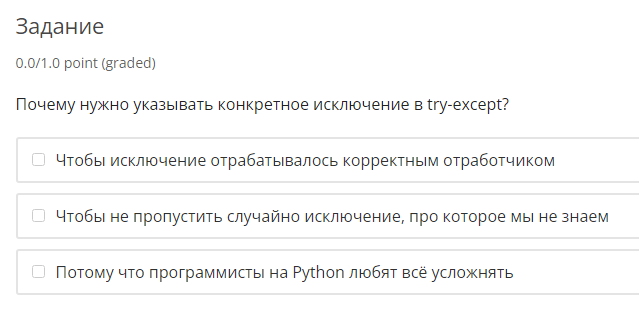

# 8. Иерархия исключений
Иерархия исключений  
Исключения в Python имеют иерархию: у нас есть более общие и более специфичные исключения. Вот график исключений:
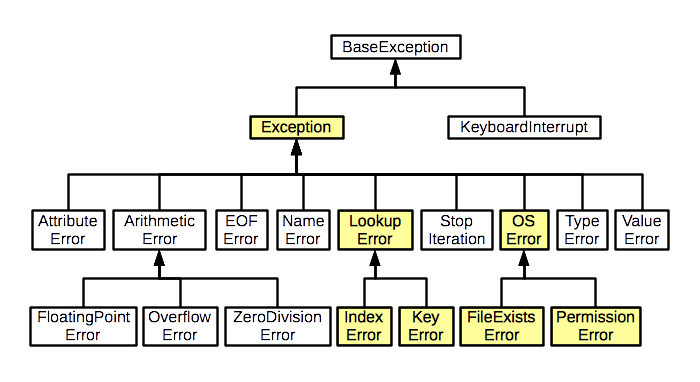

Здесь мы видим, что KeyError и IndexError являются подмножеством LookupError, которая является подмножеством Exception. На практике это имеет следующее значение: если мы укажем более верхнеуровневые исключения, то "отловятся" все дочерние, но не наоборот.
```
# Напишем функцию, которая может обращаться и к спискам, и к словарям  
# при этом не выбрасывая исключение для несуществующих индексов/ключей   
def safe_element(collection, place):  
    try:  
        return(collection[place])  
    except LookupError:  
        print("Key or index not found")  
  
users = ["Pavel", "Elena", "Sergey"]  
safe_element(users, 1)  
# => 'Elena'  
safe_element(users, 3)  
# => 'Key or index not found'   
  
prices = {"apple": 10, "orange": 20}  
safe_element(prices, "apple")  
# => 10  
safe_element(prices, "carrot")  
# => 'Key or index not found'  
```
Желательно указывать наиболее специфичное исключение. Полную иерархию можно посмотреть в документации. https://docs.python.org/2/library/exceptions.html#exception-hierarchy

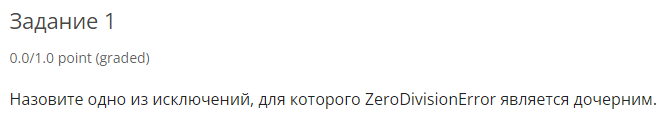

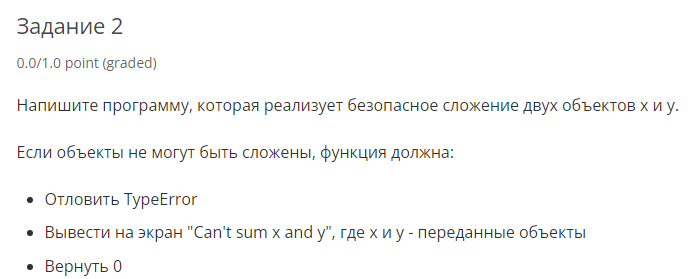
```
safe_sum(1, 2)
# 3

safe_sum(5, 'a')
# => Can't sum 5 and a
# 0 
```

# 9. Детали try-except
Мы рассмотрели базовый синтаксис try-except, однако у него есть ещё несколько вариаций. Они не часто встречаются на практике, но мы о них расскажем. Иногда в блоке except нам нужен доступ к самому объекту исключения, например, мы хотим получить поясняющее сообщение и вывести его на экран, но при этом продолжить программу дальше. Мы можем это сделать с помощью ключевого слова 'as', за которым идёт имя новой переменной.
```
try:  
    5/0  
except ZeroDivisionError as zero_error:  
    # здесь в zero_error мы получаем сам объект исключения  
    # print как раз выведет его поясняющее сообщение  
    print(zero_error)  
  
print("Program ends correctly")  
  
# => division by zero  
# => Program ends correctly  
```
Ещё один распространённый подход: мы совершаем какое-то промежуточное действие, а потом перевыбрасываем исключение.
```
# Пусть у нас есть функция, которая шлёт емейл разработчику об ошибке  
def notify_admin(error):  
    print("Mail to administrator has been sent about", error)  
      
value = "poem"  
try:  
    digitized = int(value)  
except ValueError as digitized_error:  
    notify_admin(digitized_error)  
    raise digitized_error  
      
# => Mail to administrator has been sent about invalid literal for int() with base 10: 'poem'  
# ---------------------------------------------------------------------------  
# ValueError                                Traceback (most recent call last)  
# <ipython-input-121-3fd4cd869d2d> in <module>  
#       8 except ValueError as digitized_error:  
#       9     notify_admin(digitized_error)  
# ---> 10     raise digitized_error  
#      11   
#      12   
  
# <ipython-input-121-3fd4cd869d2d> in <module>  
#       5 value = "poem"  
#       6 try:  
# ----> 7     digitized = int(value)  
#       8 except ValueError as digitized_error:  
#       9     notify_admin(digitized_error)  
  
# ValueError: invalid literal for int() with base 10: 'poem' 
```
Обратите внимание, что в начале ошибки есть уведомление о том, что email отправлен. Еще одна полезная функция: для одного try вы можете писать сразу много except на разные исключения.
```
try:  
    # открываем файл и считываем строку  
    data_file = open("valuble_data.txt")  
    s = data_file.readline()  
    # пробуем преобразовать её в число  
    i = float(s.strip())  
except OSError as err:  
    # если файла нет или его не удаётся прочитать, мы получил ошибку операционной системы   
    print("OS error: {0}".format(err))  
except ValueError:  
    # если данные не преобразуется в число, мы получим ValueError  
    print("Could not convert data to float")  
  
# => OS error: [Errno 2] No such file or directory: 'valuble_data.txt'  
```
У try-except есть блоки else и finally; первый выполняется в случае, если мы не встретили исключение в try, и используется в основном для написания чуть более чистого кода. Finally выполняется в любом случае, даже если возникло непредвиденное исключение или выход с помощью return. Обычно используется для корректного освобождения ресурсов, например, закрытия файлов.

Надеемся, что система исключения для вас стала более понятной, и вы сможете более свободно работать с ошибками.

# 10. Отладка: введение
Отладка: введение
В этом разделе мы обсудим подходы, которые помогают быстрее найти и исправить ошибки. Приведённые методы хорошо зарекомендовали себя на практике. Тем не менее единого метода, который бы работал всегда, нет, и разнообразие видов ошибок превращает отладку в настоящее искусство. Научиться определять необходимый метод вы сможете со временем.

Ошибки можно условно поделить на два класса:
- явные, которые выбрасывают исключение;
- неявные (баги): программа формально работает, но есть какой-то изъян в логике, так что вы получаете не то, что хотели.

Для примеров в этом разделе мы будем использовать датасет о фильмах с imdb. В датасете указана основная информация: сборы, год выпуска и т.д. Первые строки датасета:
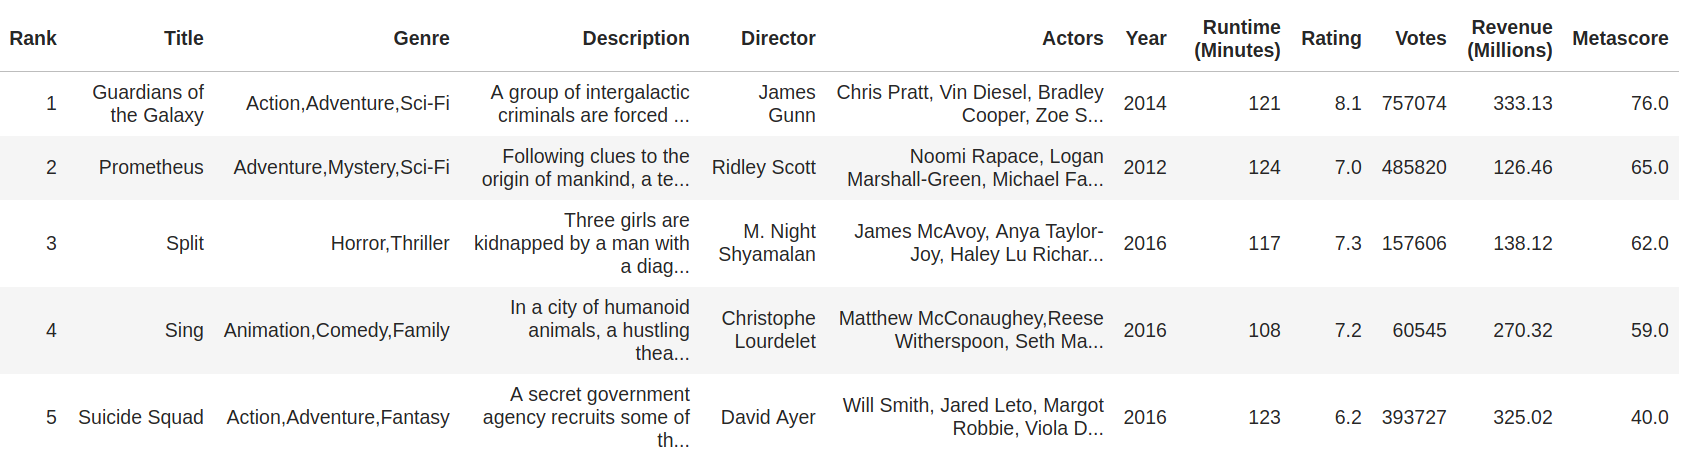

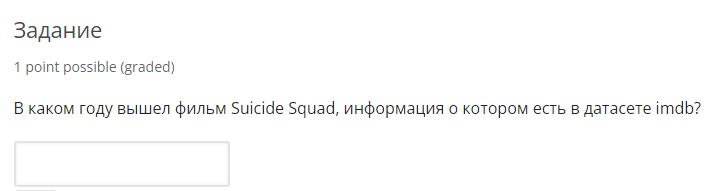

# 11. Отладка исключений
Разберёмся с явными ошибками, они гораздо проще в исправлении. Для начала нужно прочитать сообщение об ошибке: смотрим на тип исключения и поясняющее сообщение, чтобы понять природу ошибки, затем на стэк вызова, чтобы определить место, где она возникла, и само содержание строки.
```
# для примера попробуем написать функцию, которая печатает первые 5 строчек csv файла с нашими данными  
import csv  
  
# открываем файл  
with open("imdb.csv", newline="") as csvfile:  
    # делаем reader, который построчно берёт данные из файла  
    reader = csv.reader(csvfile)  
    for i in xrange(5):  
        print(next(reader))  
          
# ---------------------------------------------------------------------------  
# NameError                                 Traceback (most recent call last)  
# <ipython-input-201-6e6f17831e06> in <module>  
#       6     # делаем reader, который построчно берёт данные из файла  
#       7     reader = csv.reader(csvfile)  
# ----> 8     for i in xrange(5):  
#       9         print(next(reader))  
#      10   
  
# NameError: name 'xrange' is not defined  
```
Дальше мы смотрим на исключение и поясняющее сообщение NameError: name 'xrange' is not defined. В стэке вызова мы видим, что это имя использовалось в 8-ой строчке. Хrange было функцией в Python2, но в Python3 её переименовали в range. Исправим это:
```
import csv  
  
with open("imdb.csv", newline="") as csvfile:  
    reader = csv.reader(csvfile)  
    for i in range(5):  
        print(next(reader))  
  
# => ['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']  
# ['1', 'Guardians of the Galaxy', 'Action,Adventure,Sci-Fi', 'A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.', 'James Gunn', 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana', '2014', '121', '8.1', '757074', '333.13', '76']
# ...
```

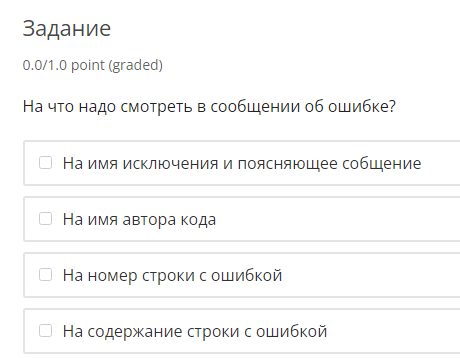

# 12. Отладка через print
Внимательное чтение сообщения уже должно решить большую часть явных ошибок с выбрасываемым исключением. Если случай более запутанный, и сходу разрешить его не удалось, ключевое здесь — понять, на каких данных ваш код не работает. В базовом варианте можно использовать print.

Выведите все релевантные данные до строки, где возникла ошибка, и подумайте, что с этими данными могло пойти не так:
```
# Теперь попробуем поместить данные в некое подобие таблицы.  
# У нас будет словарь, где ключами будут имена столбцов, а значениями - списки с данными   
import csv  
  
  
# функция, которая делает таблицу по данным из reader  
def build_table(reader):  
    table = {}  
    # инициализируем столбцы  
    headers = next(reader)  
    for header in headers:  
        table[header] = []  
          
    # считываем данные      
    for row in reader:  
        for header in headers:  
            table[header].append(row[header])  
              
    return table  
  
with open("imdb.csv", newline="") as csvfile:  
    # делаем reader, который построчно берёт данные из файла  
    reader = csv.reader(csvfile)  
    # строим таблицу  
    imdb_data = build_table(reader)  
  
  
# ---------------------------------------------------------------------------  
# TypeError                                 Traceback (most recent call last)  
# <ipython-input-207-9a69df7712c2> in <module>  
#      23     reader = csv.reader(csvfile)  
#      24     # строим таблицу  
# ---> 25     imdb_data = build_table(reader)  
#      26   
#      27 # ---------------------------------------------------------------------------  
  
# <ipython-input-207-9a69df7712c2> in build_table(reader)  
#      15     for row in reader:  
#      16         for header in headers:  
# ---> 17             table[header].append(row[header])  
#      18   
#      19     return table  
  
# TypeError: list indices must be integers or slices, not str  
```
Мы получили TypeError и сообщение, что индекс должен быть числом в 17 строке. Сразу может быть непонятно, почему это произошло, поэтому давайте посмотрим на данные:
```
import csv  
  
  
def build_table(reader):  
    table = {}  
    headers = next(reader)  
    for header in headers:  
        table[header] = []  
          
    for row in reader:  
        for header in headers:  
            # Мы выводим значения всех переменных, которые задействованы в ошибочной строке  
            print("Header:", header)  
            print("Table:", table)  
            print("Row:", row)  
            table[header].append(row[header])  
              
    return table  
  
with open("imdb.csv", newline="") as csvfile:  
    reader = csv.reader(csvfile)  
    imdb_data = build_table(reader)  
  
  
# Header: Rank  
# Table: {'Rank': [], 'Title': [], 'Genre': [], 'Description': [], 'Director': [], 'Actors': [], 'Year': [], 'Runtime (Minutes)': [], 'Rating': [], 'Votes': [], 'Revenue (Millions)': [], 'Metascore': []}  
# Row: ['1', 'Guardians of the Galaxy', 'Action,Adventure,Sci-Fi', 'A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.', 'James Gunn', 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana', '2014', '121', '8.1', '757074', '333.13', '76']  
```
Вот наша строка с ошибкой: table[header].append(row[header]). В ней мы видим два потенциальных места, где могла произойти ошибка, — table[header] и row[header]. Смотрим на данные, header — это строка "Rank". В словаре table есть ключ "Rank", значит, ошибка не там. Но row является списком, поэтому мы должны использовать численный индекс, а не строку. Исправим программу, чтобы передавался последовательный номер заголовка, а не он сам:
```
import csv  
  
  
def build_table(reader):  
    table = {}  
    headers = next(reader)  
    for header in headers:  
        table[header] = []  
          
    for row in reader:  
        # Обратите внимание, что теперь мы используем индекс столбца, а не его имя для обращения к элементу row  
        for i, header in enumerate(headers):  
            table[header].append(row[i])  
              
    return table  
  
with open("imdb.csv", newline="") as csvfile:  
    reader = csv.reader(csvfile)  
    imdb_data = build_table(reader)  
  
  
# Выведем данные в полученной таблице  
for header, values in imdb_data.items():  
    print(header, values[:5])  
  
# Rank ['1', '2', '3', '4', '5']  
# Title ['Guardians of the Galaxy', 'Prometheus', 'Split', 'Sing', 'Suicide Squad']  
# Genre ['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi', 'Horror,Thriller', 'Animation,Comedy,Family', 'Action,Adventure,Fantasy']  
# ...  
```
Всё работает! В конце заметим, что print выводит строку без кавычек, что иногда затрудняет понимание данных.
```
print(5)  
# => 5  
print("5")  
# => 5  
Быстрый способ обойти это — использовать метод repr(). Он старается вывести объекты так, как они бы выглядели в самом коде:

print(repr(5))  
# => 5  
print(repr("5"))  
# => '5'  
```

# Задание 1
Что выведет следующая часть кода с repr?
```
print(repr('12.48'))
```

# Задание 2
У вас есть функция, которая должна убирать дубликаты из списка и сохранять при этом порядок:
```
remove_dups([1, 12, 4, 1, 4, 8])
# => [1, 12, 4, 8]
```
Сейчас она не очень хорошо написана и возвращает исключение: исправьте её
```
from copy import copy

def remove_dups(values):
    values = copy(values)
    for i in range(len(values)):
        if values[i+1] in values[i:]:
            values.remove(values[i])
    return values
```

# 13. Отлов багов
"Отлов" багов
Баги — ошибки в логике программы, и они менее очевидны для отладки, чем явные исключения. Вы можете быть уверены, что код работает идеально, а спустя несколько дней обнаружить, что он возвращает неверные ответы. Начинать следует с определения места ошибки; так как сообщений об ошибке нет, то задача сводится к нахождению аномалии в данных. Для этого отлично подходят дебаггеры, и в Python есть встроенный — pdb.
https://lms.skillfactory.ru/assets/courseware/v1/bcec03a0619c16a490847b8d8975b1df/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/bears.gif
Ранее мы использовали print, чтобы выводить переменные перед строкой с ошибкой. Дебаггеры решают примерно ту же задачу, только делают это гораздо лучше: они позволяют остановить программу посреди выполнения и посмотреть на её состояние через интерактивную консоль.

Чтобы поставить программу на паузу в определённом месте, вызовите метод set_trace на этой строчке:
```
import pdb; pdb.set_trace()  
```
Когда вы запустите программу и интерпретатор дойдёт до этой строчки, у вас откроется интерактивная консоль.

Возможности дебаггера:
- возможно выполнение любого корректного кода в нём: вывести значения любой доступной переменной, метод locals() выведет локальные переменные;
- PP позволяет вывести словари и их объекты, что упрощает чтение;
- перемещение по коду: next выполнит следующую строку, return выполнит весь код до конца текущей функции и вернёт интерактивную консоль на следующей строчке, continue выйдет из интерактивного режима и продолжит программу.

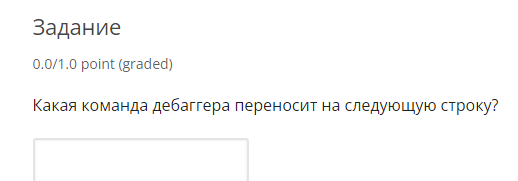

# 14. Использование pdb
Использование pdb
В предыдущем блоке мы привели основные команды pdb. Полный список команд выводится по запросу help внутри интерактивной сессии pdb, а пока давайте посмотрим работу метода на конкретном примере. Пусть у нас есть следующая функция:
```
from collections import Counter  
  
# Считаем, сколько фильмов в каждом жанре  
def count_genres(column):  
    genres = []  
    for movie_genres in column:  
        splitted = movie_genres.split(",")  
        genres.extend(splitted)  
    counter = Counter(genres)  
      
    return counter   
   
print(count_genres(imdb_data["Genre"]))  
# Counter({'Drama': 513, 'Action': 303, 'Comedy': 279, 'Adventure': 259, 'Thriller': 195, 'Crime': 150, 'Romance': 141, 'Sci-Fi': 120, 'Horror': 119, 'Mystery': 106, 'Fantasy': 101, 'Biography': 81, 'Family': 51, 'Animation': 49, 'History': 29, 'Sport': 18, 'Music': 16, 'War': 13, 'Western': 7, 'Musical': 5})  
```
Мы получили результат, но чтобы лучше понять, как мы это сделали, воспользуемся дебаггером. Для этого поставим вызов pdb.set_trace() в начале функции. Вызов дебаггера часто называют брейкпоинтом (breakpoint, точка прерывания), потому что программа ставится на паузу в этой точке.
```
from collections import Counter  
import pdb  
  
  
def count_genres(column):  
    genres = []  
    # ставим брейкпоинт в этом месте  
    pdb.set_trace()  
    for movie_genres in column:  
        splitted = movie_genres.split(",")  
        genres.extend(splitted)  
    counter = Counter(genres)  
      
    return counter   
   
print(count_genres(imdb_data["Genre"])) 
```
При выполнении программы у нас запустится интерактивная сессия. Ниже идут команды к pdb, и что он возвращает.  Команды идут после символов (Pdb), которые консоль выводит сама.
``` 
# При запуске дебаггер показывает, что мы находимся на 8 строке  
> <imdb.py>(8)count_genres()  
-> for movie_genres in column:  
      
# Попробуем вывести жанры. На этот момент это должен быть пустой список  
(Pdb)  genres  
[]  
  
# Перейдём на три строки вниз, для этого три раза вызовем next  
(Pdb)  next  
> <imdb.py>(9)count_genres()  
-> splitted = movie_genres.split(",")  
  
(Pdb)  next  
> <imdb.py>(10)count_genres()  
-> genres.extend(splitted)  
  
  
(Pdb)  next  
> <imdb.py>(8)count_genres()  
-> for movie_genres in column:  
  
# Выведем значение splitted и genres, чтобы посмотреть их содержание.  
# На этот раз в genres должно быть как раз содержания splitted  
(Pdb)  splitted  
['Action', 'Adventure', 'Sci-Fi']  
      
(Pdb)  genres  
['Action', 'Adventure', 'Sci-Fi']  
  
# Выйдем из интерактивной сессии и продолжим программу до конца.  
(Pdb)  continue  
Counter({'Drama': 513, 'Action': 303, 'Comedy': 279, 'Adventure': 259, 'Thriller': 195, 'Crime': 150, 'Romance': 141, 'Sci-Fi': 120, 'Horror': 119, 'Mystery': 106, 'Fantasy': 101, 'Biography': 81, 'Family': 51, 'Animation': 49, 'History': 29, 'Sport': 18, 'Music': 16
```
Рекомендуем запустить дебаггер для какой-то простой программы, чтобы посомтреть на программу глазами интерпретатора и лучше понять поток данных в ней. Для отладки нужно поставить брэкпонит в точке, где у вас всё работает нормально и проходить до момента, где уже точно сломалось. Так вы с высокой вероятностью найдёте аномалию в данных и сможете исправить ошибку.

# Задание
У нас есть функция group_values(db, value_key, group_key, step). Она должна группировать объекты из db по ключу group_key с шагом step. В результат попадает только значение аттрибута value_key.

Это похоже на гистограмму, когда мы раскладываем значения по корзинам определённого размера. Скажем, у нас есть пользователи:
```
   user_db = [
    {"name": "Elena", "age": 19, "salary": 80000},
    {"name": "Sergey", "age": 31, "salary": 160000},
    {"name": "Olga", "age": 33, "salary": 170000},
    {"name": "Vadim", "age": 17, "salary": 45000}
]
```
Мы хотим сгруппировать их зарплаты(salary) по возрасту(age) с шагом в 10 лет. Получится
```
group_values(user_db, "salary", "age", 10)
# => 
# {
#     10: [80000, 45000],
#     30: [160000, 170000]
# }
```
Обратите внимание. Функция должна возвращать словарь, по ключам которого расположены списки.
Сейчас функция возвращает что-то не то. Исправьте это, пользуясь pdb. Для этого вам нужно скопировать код на свой компьютер и запустить либо в Python, либо в Jupyter. Входной формат именно такой, как указан в примере user_db
```
from collections import defaultdict

def group_values(db, value_key, group_key, step):
    grouped = defaultdict(list) 
    for item in db:
        grouped[item[group_key] % step].append(item[value_key])
    return grouped
```

# 15. Смысл тестирования
Объяснение смысла тестирования начнём с классического анекдота.

У программиста спрашивают:

— В чём сложность поддержки большого проекта?

Программист:

— Представь, что ты писатель и поддерживаешь проект «Война и мир». У тебя ТЗ — написать главу, как Наташа Ростова гуляла под дождём по парку. Ты пишешь «шёл дождь», сохраняешь, вылетает сообщение об ошибке «Наташа Ростова умерла, продолжение невозможно». Почему умерла? Начинаешь разбираться. Выясняется, что у Пьера Безухова скользкие туфли, он упал, его пистолет ударился о землю и выстрелил в столб, а пуля от столба срикошетила в Наташу. Что делать? Зарядить пистолет холостыми? Поменять туфли? Решили убрать столб. Получаем сообщение «Поручик Ржевский умер». Выясняется, что он в следующей главе опирается на столб, которого уже нет.

Чем сложнее программа, тем больше вероятность ошибки. Если вы постоянно меняете ошибку в разных местах, то функции, которые работали вчера, могут не сработать сегодня. Ситуация усложняется, если вы работаете в команде: нельзя гарантировать, что изменения, внесенные коллегой, не сломают ваш код.

Вы можете проверять код руками с помощью print, дебаггера и анализа результата выполнения программы. Это может нормально работать для небольших программ, но с ростом количества кода и функций каждая проверка требует больше времени. Кроме того, вы вряд ли сможете каждый раз проверять все функции и ограничитесь одной-двумя базовыми проверками, что плохо скажется на качестве.

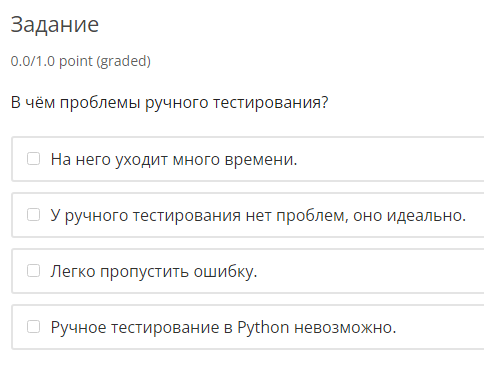

# 16. Автоматическое тестирование
Сложности, которые могут возникнуть  с ручным тестированием, может решить автоматическое тестирование. В разделе отладки мы говорили, что нужно анализировать поток данных: что поступает на вход и получается на выходе; на это и нацелены тесты функций.

Воспользуемся библиотекой pytest, которая позволяет определять тесты и используется в крупных проектах. Документацию к библиотеке можно посмотреть здесь. 

Запустилось три теста (collected 3 items), и все три корректно отработали (3 passed):
```
# Чтобы написать тест, мы должны определить функцию, имя которой начинается на test_  
# после этого мы используем ключевое слово assert, которое проверят, является ли истинным значение сразу за ним  
def test_something():  
    assert True  
      
def test_equal_string():  
    greetings = "Hello, " +  "world"  
    assert greetings == "Hello, world"  
  
def test_numbers():  
    total = 73 + 42  
    assert total == 115  
  
# После этого мы запускаем код с помощью pytest из консоли  
# >> pytest basic_test.py  
# ============================= test session starts ==============================  
# collected 3 items                                                                
  
# basic_test.py ...                                                        [100%]  
  
# =========================== 3 passed in 0.03 seconds ===========================  
```
У нас две проблемы с данными в столбце:

численные данные заведены строкой, так что мы не можем выполнять арифметические операции;
в данных есть пропуски, например, не у всех фильмов есть оценка с metascore.
Напишем и протестируем функцию, которая это исправляет. Все тесты проходят, всё корректно работает:
```
# Функция, которая обращает все строки в числа и подставляет значение по умолчанию, если встречает пропуск.  
def digitize_values(collection, default=0):  
    no_missed = [value if value else default for value in collection]   
    return [float(value) for value in no_missed]  
  
# Мы передаём на вход произвольные параметры и смотрим, что функция корректно работает с ними   
# Проверим, что функция корректно обращает список строк в список чисел  
def test_digitize_convert_to_float():  
    assert digitize_values(["10", "50"])  == [10, 50]  
    assert digitize_values(["70.2", "33.4"]) == [70.2, 33.4]  
      
# Хорошей практикой считается покрывать разные аспекты функции в разных тестах  
# Здесь мы проверим, что функция закрывает пропуски   
def test_digitize_restore_missed():  
    assert digitize_values([""], 10) == [10]  
    assert digitize_values(["20", None], 50) == [20, 50]  
      
# Ещё стоит проверять, что наша функция корректно работает на граничных значениях  
# Например, на пустых данных  
def test_digitize_empty():  
    assert digitize_values([]) == []  
      
      
# Запустим тесты  
# >>> pytest digitize.py  
# ============================= test session starts ==============================  
# collected 3 items                                                                
  
# digitize.py ...                                                          [100%]  
  
# =========================== 3 passed in 0.04 seconds =========================== 
```

Задание
0.0/1.0 point (graded)
У нас есть четыре функции. Какие из них являются корректными тестами в pytest?
```
# 1
def apply_test():
    test_str = "quick brown fox"
    assert test_str[::-1] == "xof nworb kciuq" 

# 2
def test_value():
    assert 3 + 3 == 6

# 3
def test_reverse():
    assert not False 

# 4
def test_list:
    assertion 5 in [1, 2, 5]
```
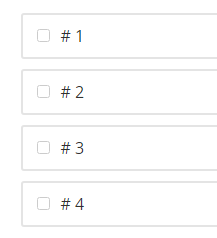

# 17. Типы тестов
Тесты, которые мы написали в предыдущем блоке, называются unit-тестами, потому что они проверяют отдельный блок. Они помогают проверить работу отдельных функций, но остаётся вопрос: корректно ли функции взаимодействуют друг с другом. Для этого есть ещё два типа тестов: интеграционный и приёмочный.

Интеграционные тесты проверяют, что отдельные функции корректно обмениваются данными. Это подобно проверке того, что USB-провод входит в USB-порт. Приёмочные тесты проверяют код в контексте пользователя, например, автоматически прокликивая программу или веб-приложение на популярных сценариях использования продукта.

Тестирование — большая область; есть отдельные курсы на эту тему и даже отдельная профессия QA-инженер, который занимается исключительно тестированием. Мы надеемся, что у вас появилось общее представление о том, зачем нужны тесты и как их делать. Более подробное введение в тестирование есть в книгах Гарри Персиваля (https://www.labirint.ru/books/641696/) и Брайана Оккена(https://www.amazon.com/Python-Testing-pytest-Effective-Scalable/dp/1680502409).

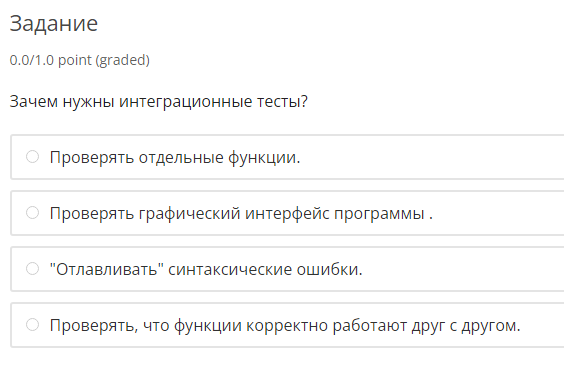

# 18. Итоги
В этом модуле мы:
- научились читать сообщения об ошибках;
- узнали, что такое исключения, откуда они берутся и как используются;
- научились пользоваться конструкцией try-except;
- посмотрели, как и в каких ситуациях применять дебаггер и тестирование.

Мы надеемся, что это позволит вам эффективнее и увереннее избавляться от ошибок и писать надёжный код.

# 19. Тесты
# Задание 1
Вы получили сообщение об ошибке. Назовите имя исключения:
```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
ipython-input-207-9a69df7712c2 in module
     23     reader = csv.reader(csvfile)
     24     # строим таблицу
---> 25     imdb_data = build_table(reader)
     26 
     27 # ---------------------------------------------------------------------------

ipython-input-207-9a69df7712c2 in build_table(reader)
     15     for row in reader:
     16         for header in headers:
---> 17             table[header].append(row[header])
     18 
     19     return table
TypeError: list indices must be integers or slices, not str
```

# Задание 2
Напишите функцию safe_exec(ext_func), которая получает на вход функцию func и пробует её выполнить.

Если func выбрасывает исключение, то safe_exec выводит поясняющее сообщение этого исключения и возвращает 0.

Если func завершается корректно, то мы возращаем результат выполнения функции.
```
def zero_div():
    return 5/0
safe_exec(zero_div)
=> division by zero
=> 0

def normal_div():
    return 5/1
safe_exec(normal_div)
=> 5
```

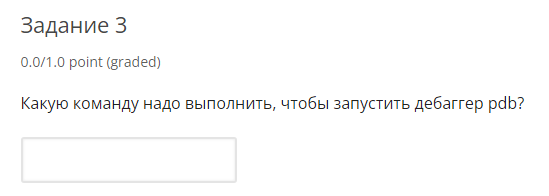

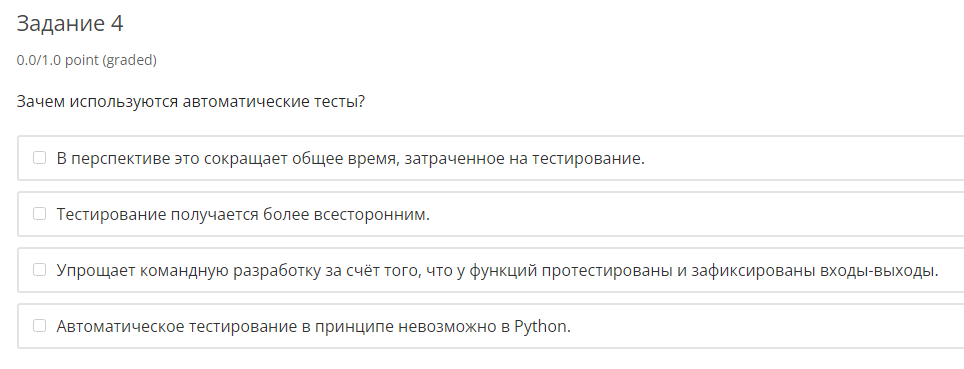